## ECOD Algorithm

**The Basic Idea**: 
Outliers can be thought of as rare events in a dataset. If we imagine our dataset as a landscape, these rare events are like remote islands. In terms of a probability distribution (the landscape's shape), outliers usually sit in areas with very low probabilities, often at the far ends (or tails) of the distribution.

**Unimodal Distribution**: 
If our distribution has just one peak (it's unimodal), then the outliers are typically found at the extreme ends or tails.

**ECOD Method**: 
This method determines how "extreme" or rare a data point is by calculating its tail probabilities. It's like asking, "How likely is it to find a point as extreme as this?"

**Joint Cumulative Distribution Function (CDF)**: 
This function calculates the probability of events happening simultaneously across multiple dimensions or features. For a given data point, the CDF tells us the probability of seeing values less than or equal to that point across all dimensions.

**Interpreting CDF**:
The value from the CDF tells us about the "extremeness" on the left side (lower values). A smaller CDF value means the data point is more extreme on the left. Conversely, \(1-\) CDF value tells us about the "extremeness" on the right side (higher values).

**Estimating the CDF**:
In reality, we don't know the exact CDF; we only have our data to estimate it. The challenge is, as you have more dimensions (features), it's harder to estimate the joint CDF accurately. So, the solution proposed is to assume each dimension is independent of the others, simplifying our estimation task.

**Empirical CDF (ECDF)**: 
To estimate the CDF for each dimension, they use the ECDF. This is a non-parametric way to estimate the CDF using the actual data points. They compute this separately for the left and right tails.

**Important Note**:
When calculating the right tail, they ensure they use a strict inequality (i.e., > instead of ≥) to maintain symmetry with the left tail estimation.

**ECOD's Process**:
1. Calculate the left and right tail ECDFs for each dimension.
2. For each data point, combine its tail probabilities to create a final "outlier score". This score tells us how likely the point is to be an outlier. A higher score means it's more likely to be an outlier.

**Aggregation**:
The challenge is how to combine (or aggregate) these probabilities. It's not just about taking left or right tails separately. When you have many dimensions, there are numerous combinations. ECOD smartly uses the "skewness" of each dimension to decide whether to consider the left or the right tail probability.

In essence, ECOD uses a data-driven approach to look at the tails of the distribution across multiple dimensions to identify outliers. The method involves estimating probabilities and intelligently combining them to produce a score that indicates the likelihood of a point being an outlier.

## Finding Outliers Using Skewness

### Main Idea
When searching for outliers in multi-dimensional data, merely looking at the extreme left or extreme right of every dimension might miss some outliers. Depending on the nature of the data distribution in each dimension, sometimes it's better to look at the left, and other times, at the right. The question is: how do we decide?

### Using Skewness
Skewness is a measure that tells us about the shape of the data distribution:
- **Negatively Skewed**: The data tail stretches more to the left.
- **Positively Skewed**: The tail stretches to the right.

### An Example
Imagine a two-dimensional plot:
- **Normal Points**: Clustered at the top right (in blue)
- **Outliers**: Scatter uniformly (in red)

1. Using the **left tail** to find outliers works great because outliers are to the left of the main cluster.
2. Using the **right tail** fails since it wrongly classifies large normal points as outliers.
3. **Averaging results** from both tails gives mixed results—some real outliers are found, but some normal points are wrongly classified.

If the dataset were flipped (normal points at the bottom left and outliers at the top right), then using the right tail would be a better choice.

### Skewness Solution
To tackle this, we use the skewness of each dimension:
- For **negative skewness**, focus on the left tail.
- For **positive skewness**, focus on the right tail.

This way, by aligning the search for outliers with the skewness of the data, we can spot the real outliers more accurately.

### Calculating Skewness
Skewness for each dimension can be computed using:

$`\gamma_j = \frac{\sum_{i=1}^{n}(X^{(j)}_i - \bar{X}^{(j)})^3 / n}{(\sum_{i=1}^{n}(X^{(j)}_i - \bar{X}^{(j)})^2 / (n-1))^{3/2}}`$

Where:
- $`\gamma_j`$ is the skewness for the j-th dimension.
- $`X^{(j)}_i`$ is the i-th data point in the j-th dimension.
- $`\bar{X}^{(j)}`$ is the average of the j-th dimension.

Based on $`\gamma_j`$:
- If $`\gamma_j < 0`$, the data in the j-th dimension is negatively skewed. Focus on the left tail.
- If $`\gamma_j > 0`$, focus on the right tail.

### Final Outlier Score
The outlier score for each point is calculated using the negative logarithm of the tail probability. The score can:
- Focus on the left,
- Focus on the right,
- Or use skewness to decide which tail to consider for each dimension.

In essence, this method provides a way to intelligently search for outliers by aligning with the natural skewness of each dimension.


Skewness gives us information about the direction and amount of skew (departure from horizontal symmetry) in the data. Let's break it down with a simple numerical example.

Let's consider a set of numbers: 
$`X = \{2, 3, 4, 5, 6, 7, 8, 9, 10, 20\}`$

Clearly, the number 20 is a right outlier in this dataset.

1. **Mean Calculation**: 
$`\bar{X} = \frac{2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 20}{10} = 7.4`$

2. **Numerator of Skewness**: It is the mean of the cubed differences from the mean.
$`\sum_{i=1}^{n}(X_i - \bar{X})^3 / n`$
Using the provided dataset, the sum of the cubed differences from the mean can be significantly influenced by the outlier (20). Since 20 is greater than the mean, the value of $`(20-7.4)^3`$ is large and positive.

3. **Denominator of Skewness**: It is essentially the standard deviation of the dataset raised to the third power. It gives an indication of the spread of the dataset.
$`(\sum_{i=1}^{n}(X_i - \bar{X})^2 / (n-1))^{3/2}`$
This is mostly influenced by the dispersion of the numbers around the mean, rather than by outliers.

4. **Skewness Calculation**:
When you divide the numerator by the denominator:
$`\gamma = \frac{\text{Mean of cubed differences from the mean}}{\text{Standard deviation cubed}}`$
Given that the numerator is influenced by our right outlier, the skewness value will turn out to be positive. A positive value indicates that the tail is stretching more towards the right, implying a right-skewed distribution.

If the outlier were on the left, for instance, if our dataset was:
$`X = \{2, 3, 4, 5, 6, 7, 8, 9, -10, 10\}`$
The skewness would turn out to be negative because the large, negative cubed difference from the mean (for -10) would pull down the mean of the cubed differences, leading to a left-skewed distribution.

In essence:
- **Negative Skewness** indicates that the tail is stretched further to the left, not the right. This implies the presence of outliers or a cluster of data points on the left.
- **Positive Skewness** indicates that the tail is stretched further to the right, not the left. This implies the presence of outliers or a cluster of data points on the right.

This is a simplification and for real-world data, we'd consider various factors, but this gives a basic understanding of why skewness behaves the way it does.


## Gamma Distribution

The gamma distribution is a continuous probability distribution that is used in various scientific disciplines such as hydrology, queueing theory, and finance. The gamma distribution can be thought of as a generalization of the exponential distribution and the Erlang distribution.

Mathematically, the probability density function (PDF) of the gamma distribution is given by:

$`f(x|\alpha,\beta) = \frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}`$

for $`x > 0`$, $`\alpha, \beta > 0`$, and where $`\Gamma(\alpha)`$ is the gamma function.

Here:
- $`\alpha`$ is the shape parameter.
- $`\beta`$ is the rate parameter which is the inverse of the scale parameter. So, if you know the scale (often denoted as $`\theta`$), then $`\beta = 1/\theta`$.

The parameters control the shape and scale of the distribution:

- **Shape ($`\alpha`$)**: Determines the overall shape of the distribution. When $`\alpha = 1`$, the gamma distribution becomes the exponential distribution. As $`\alpha`$ increases, the distribution becomes more symmetric.
  
- **Scale ($`\theta`$ or its inverse, the rate $`\beta`$)**: Determines the spread or stretch of the distribution. Larger values of $`\theta`$ (or smaller values of $`\beta`$) will stretch the distribution, while smaller values of $`\theta`$ (or larger values of $`\beta`$) will squeeze or contract it.


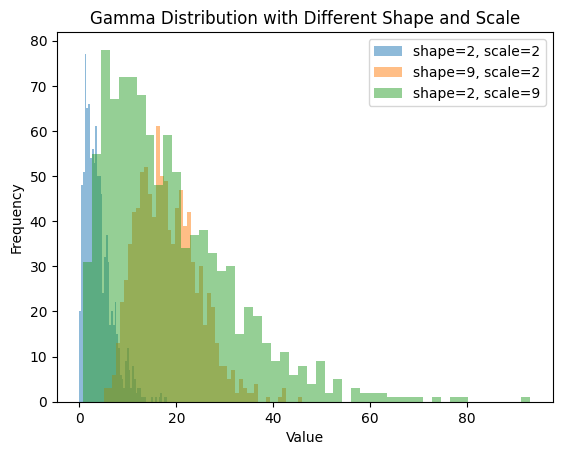

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import gamma

# Generate data
shape1, scale1 = 2, 2
shape2, scale2 = 9, 2
shape3, scale3 = 2, 9

s1 = gamma(shape1, scale1, 1000)
s2 = gamma(shape2, scale2, 1000)
s3 = gamma(shape3, scale3, 1000)

# Plot histograms
plt.hist(s1, bins=50, alpha=0.5, label=f'shape={shape1}, scale={scale1}')
plt.hist(s2, bins=50, alpha=0.5, label=f'shape={shape2}, scale={scale2}')
plt.hist(s3, bins=50, alpha=0.5, label=f'shape={shape3}, scale={scale3}')

plt.legend()
plt.title("Gamma Distribution with Different Shape and Scale")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In the above example, we generate a dataset of 1000 numbers for each of the three distributions and plot histograms for visualization.

### Interpretation:
shape=2, scale=2: This would give a distribution that starts from 0, peaks at a certain value, and then decays. Since the shape is relatively low, the distribution won't be too peaky.

shape=9, scale=2: By increasing the shape while keeping the scale constant, the distribution becomes more peaky and the peak shifts to the right.

shape=2, scale=9: Keeping the shape constant and increasing the scale stretches the distribution on the x-axis. The peak will not be as high, and the distribution will spread out more.

From the visualizations, you'll notice:

As shape increases, the distribution becomes more symmetric and peaky.
As scale increases, the distribution stretches out on the x-axis, spreading the values over a broader range.

Given a standard normal distribution (a bell curve), we have the following properties:

- About 68% of the data falls within 1 standard deviation ($`\sigma`$) from the mean ($`\mu`$).
- Roughly 95% falls within 2 standard deviations.
- About 99.7% is within 3 standard deviations.

Using the above, if we have a mean ($`\mu`$) of 0 and a standard deviation ($`\sigma`$) of 5:

- 68% of the data will be between $`\mu - \sigma`$ and $`\mu + \sigma`$: -5 to 5.
- 95% of the data will be between $`\mu - 2\sigma`$ and $`\mu + 2\sigma`$: -10 to 10.
- 99.7% of the data will be between $`\mu - 3\sigma`$ and $`\mu + 3\sigma`$: -15 to 15.


In [2]:
# Create a combined distribution
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, gamma

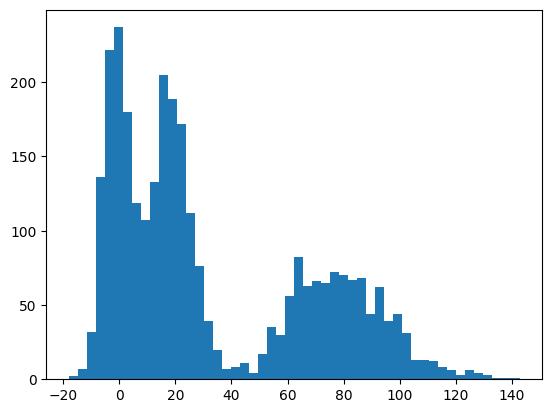

In [3]:
shape, scale = 10, 2.
s1 = gamma(shape, scale, 1000)
s2 = gamma(shape * 2, scale * 2, 1000)
s3 = normal(loc=0, scale=5, size=1000)

sample = np.hstack((s1, s2, s3))

plt.hist(sample, bins=50)
plt.show()

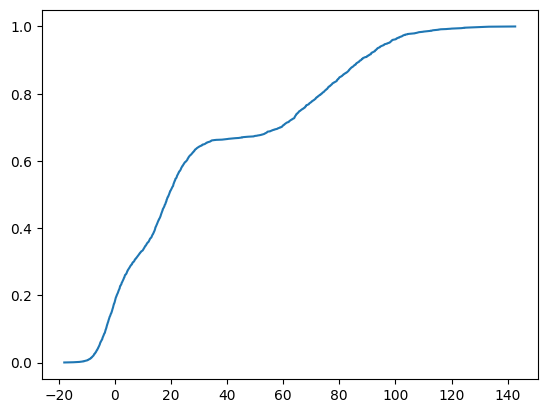

In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

sample_ecdf = ECDF(sample)
plt.plot(sample_ecdf.x, sample_ecdf.y)
plt.show()

In [5]:
print('P(x<-20): %.4f' % sample_ecdf(-20))
print('P(x<-2): %.4f' % sample_ecdf(-2))
print('P(x<0): %.4f' % sample_ecdf(0))
print('P(x<25): %.4f' % sample_ecdf(25))
print('P(x<50): %.4f' % sample_ecdf(50))
print('P(x<75): %.4f' % sample_ecdf(75))
print('P(x<100): %.4f' % sample_ecdf(100))
print('P(x<125): %.4f' % sample_ecdf(125))
print('P(x<140): %.4f' % sample_ecdf(140))
print('P(x<150): %.4f' % sample_ecdf(150))

P(x<-20): 0.0000
P(x<-2): 0.1307
P(x<0): 0.1807
P(x<25): 0.5957
P(x<50): 0.6743
P(x<75): 0.8097
P(x<100): 0.9617
P(x<125): 0.9963
P(x<140): 0.9997
P(x<150): 1.0000


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data

contamination = 0.05 # percentage of outliers
n_train = 500 # number of training rows
n_test = 500 # number of testing rows
n_features = 6 # number of columns or features


X_train, X_test, y_train, y_test = generate_data(n_train=n_train,
                                                n_test=n_test,
                                                n_features=n_features,
                                                contamination=contamination,
                                                random_state=123)

# Make the 2nd numpy array a DataFrame
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


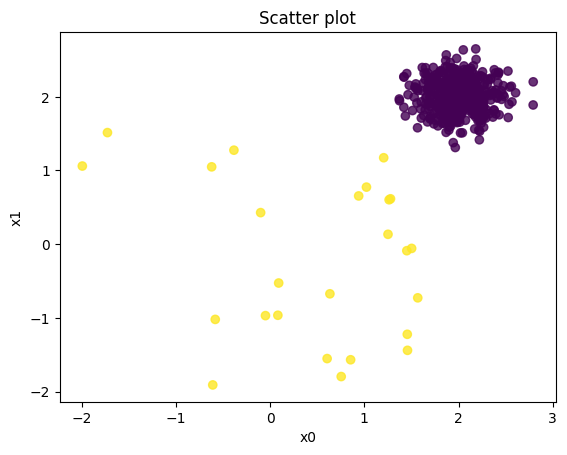

In [7]:
import utils

utils.plot_data(X_train_pd, y_train)

### Step 1: Build the Model

The ECOD (Ensemble Consistent Outlier Detector) method from the pyod library is a method that aims to generate consistent outlier scores across subsamples. The contamination parameter specifies the proportion of outliers in the dataset (in your case, 5% or 0.05).

The threshold value 16.320821760780653, isn't a percentage. It's the decision score threshold that determines what's considered an outlier and what isn't. Any data point with a decision score above this threshold is considered an outlier by the model.

In [9]:
from pyod.models.ecod import ECOD

ecod = ECOD(contamination=0.05)
ecod.fit(X_train)

# Training data
y_train_scores = ecod.decision_function(X_train)
y_train_pred = ecod.predict(X_train)

# Test data
y_test_scores = ecod.decision_function(X_test)
y_test_pred = ecod.predict(X_test)

print(f'The training data: {utils.count_stat(y_train_pred)}')
print(f'The testing data: {utils.count_stat(y_test_pred)}')
print(f'The threshold for the defined contamination rate {ecod.threshold_}')


The training data: {0: 475, 1: 25}
The testing data: {0: 473, 1: 27}
The threshold for the defined contamination rate 16.320821760780653


In [12]:
np.where(y_train_scores > 22)

(array([475, 477, 478, 479, 480, 483, 484, 486, 488, 489, 490, 492, 494,
        495, 496, 497, 498, 499]),)

### Explain Outlier Method

On the x-axis we have each feature represented, and on the y-axis we have each univariate score for each feature. For 475, since we have all of them except one above the 0.95 cutoff band we conclude that this is an outlier.

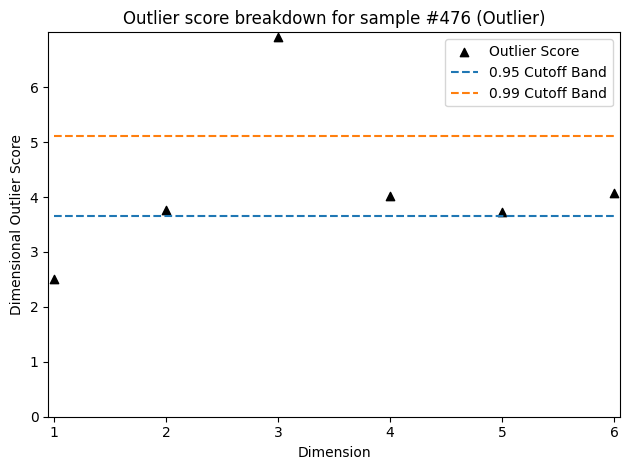

In [13]:
ecod.explain_outlier(475)

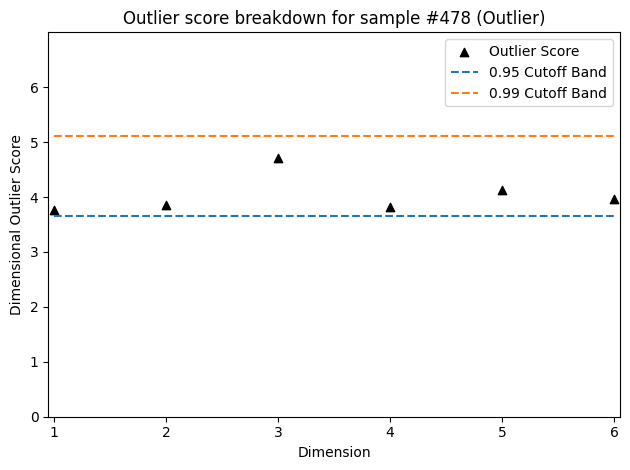

In [14]:
ecod.explain_outlier(477)

### Step 2: Determine the threshold

In most cases, we do not know the percentage of outliers. We can instead use the outlier score which measures already the deviation of an outlier from normal data. We can use the histogram of outlier score to define a reasonable threshold value. <br>

Instances with higher scores than the threshold will determine the size of the outlier. <br>

If any prior knowledge suggests that the percentage of anomalies should not be more than 1%, you can choose a threshold that results in approximately 1% of the anomalies. <br>

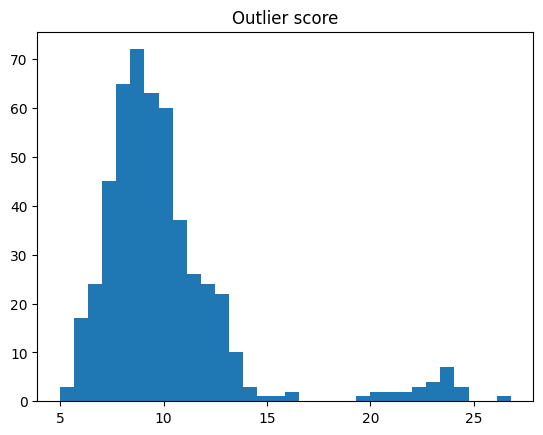

In [15]:
plt.hist(y_train_scores, bins="auto")
plt.title("Outlier score")
plt.show()

We can set the threshold at 16.0 because there is a natural cut in the histogram. If we select a low value for the threshold, the count of outliers will be high.

In [16]:
threshold = 16

utils.descriptive_stat_threshold(X_train, y_train_scores, threshold)

,Group,0,1,2,3,4,5,count,Anomaly_Score,count_perc
0,Normal,2.002636,2.010650,2.003762,1.991297,2.009442,1.984327,473,9.369008,94.6
1,Outlier,0.575888,-0.033391,-0.244842,-0.064563,0.097871,0.105026,27,22.360763,5.4


The table shows that the anomaly_score for the outliers is much higher than those for the normal group. The % count of the anomaly group is 5.4%. For each group, we have also different means between the normal group and the outlier group.

In [28]:
def confusion_matrix(actual, pred):
    df = pd.DataFrame({'actual': actual, 'predicted': pred})
    return pd.crosstab(df['actual'], df['predicted'])

confusion_matrix(y_train, y_train_pred)

predicted,0,1
actual,,
0.0,475,0
1.0,0,25


In [32]:
confusion_matrix(y_test, y_test_pred)

predicted,0,1
actual,,
0.0,473,2
1.0,0,25


Confusion matrices help us to understand the model performance

### Two Models: HBOS and ECOD 

* We can cross-tabulate with two models and assess if the outlier is being predicted by both, then it's likely to be correct

In [35]:
from pyod.models.hbos import HBOS

# Computes individual histograms for each feature and assigns score based on frequency

n_bins = 50
hbos = HBOS(n_bins=n_bins, contamination=0.05)
hbos.fit(X_train)
y_train_hbos_pred = hbos.labels_ # predictions for the training data
y_test_hbos_pred = hbos.predict(X_test)
y_train_hbos_scores = hbos.decision_function(X_train)
y_test_hbos_scores = hbos.decision_function(X_test)



In [37]:
from pyod.models.ecod import ECOD

# Non-parametric, uses skewness to check where outliers truly lie

clf_name = 'ECOD'
ecod = ECOD(contamination=0.05)
ecod.fit(X_train)
y_train_ecod_pred = ecod.labels_
y_test_ecod_pred = ecod.predict(X_test)
y_train_ecod_scores = ecod.decision_scores_
y_test_ecod_scores = ecod.decision_function(X_test)


# Thresholds
[ecod.threshold_, hbos.threshold_] # for each model, check the anomaly score that represents the threshold



[16.320821760780653, 5.563712646460526]

In [38]:
results = pd.DataFrame({'actual': y_test, 'HBOS_pred': y_test_hbos_pred, 'ECOD_pred': y_test_ecod_pred})

results.head()

,actual,HBOS_pred,ECOD_pred
0,0.0,0,0
1,0.0,0,0
2,0.0,0,0
3,0.0,0,0
4,0.0,0,0


## Model Accuracy: 

We can compute the accuracy and also the False Positives

In [40]:
def compute_metric(results: pd.DataFrame, model_name: str) -> dict:
    """Compute accuracy and false positives for the given model against actual labels"""
    accuracy = (results['actual'] == results[model_name]).mean() * 100
    fp = (sum((results['actual'] == 0) & (results[model_name] == 1)) / len(results)) * 100
    return {'accuracy': accuracy, 'false_positives': fp}

def evaluate_models(results: pd.DataFrame, models: list) -> dict:
    """Evaluate accuracy and false positives for a list of models."""
    metrics = {}
    for model in models:
        metrics[model] = compute_metric(results, model + '_pred')
    return metrics

metrics = evaluate_models(results, ['HBOS', 'ECOD'])

metrics


{'HBOS': {'accuracy': 99.8, 'false_positives': 0.2},
 'ECOD': {'accuracy': 99.6, 'false_positives': 0.4}}

In [41]:
# It's also important to know if both models claim the same "outliers"

pd.crosstab(results['HBOS_pred'], results['ECOD_pred'])


ECOD_pred,0,1
HBOS_pred,,
0,473,1
1,0,26


Both models generally agree on which instances are outliers except for 1. We can state that HBOS and ECOD models generate consistent results.